,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


Dimensions of y before reshaping: (21597,)
Dimensions of X before reshaping: (21597,)
Dimensions of y after reshaping: (21597, 1)
Dimensions of X after reshaping: (21597, 1)


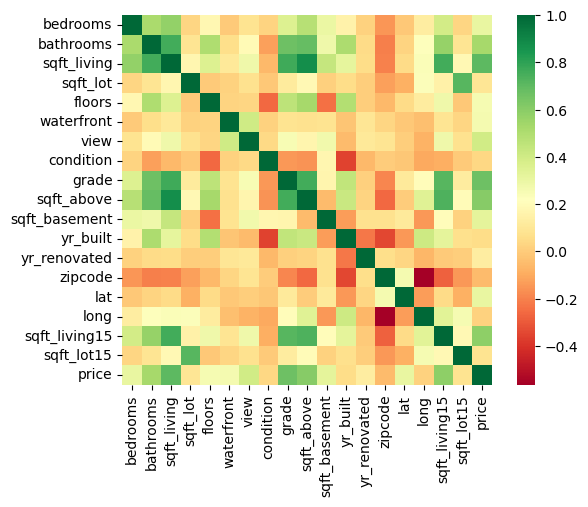

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  price 

In [9]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


### LINEAR REGRESSION 

0.49268789904035093


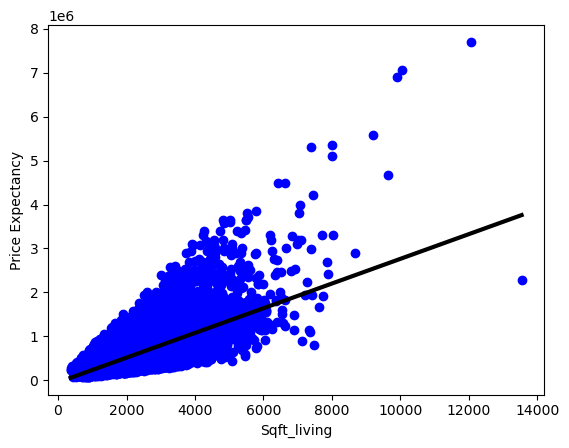

In [14]:
y = df['price'].values
X = df.drop('price', axis=1)

# Reshape to 1-D
y = y.reshape(-1, 1)
X_sqft_living = X['sqft_living'].values.reshape(-1, 1) 

_ = plt.scatter(X['sqft_living'], y, color='blue')
_ = plt.ylabel('Price Expectancy')
_ = plt.xlabel('Sqft_living')

# -----------------------
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_sqft_living), max(X_sqft_living)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_sqft_living, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_sqft_living, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [41]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5403834841354647
Root Mean Squared Error: 246869.2871066095


### DECISION TREE REGRESSION

In [48]:
X = df[['bedrooms','bathrooms', 'sqft_living', 'view', 'condition']].values
y = df['price'].values

(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1)

In [49]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.0030864197530864196

In [50]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [51]:
y_pred = clf_gini.predict(X_test)
y_pred

array([350000, 350000, 450000, ..., 350000, 450000, 525000], dtype=int64)

In [52]:
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

Accuracy is : 0.8179012345679013


### RANDOM FOREST REGRESSION 

In [55]:
selected_features = ['bedrooms','bathrooms', 'sqft_living', 'view', 'condition']
t_val_subset = df[selected_features]

In [56]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=13)

In [59]:
clf = RandomForestRegressor(n_estimators = 3000, random_state = 10)
# Train the model on training data
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=3000, random_state=10)

In [60]:
# Use the forest's predict method on the test data
prediction_s = clf.predict(X_test)
# Calculate the absolute errors
errors_s = abs(prediction_s - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_s), 2), 'degrees.')

Mean Absolute Error: 170380.1 degrees.


In [61]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors_s - y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 37105706.18 %.


### SVR

In [62]:
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 

SVR(kernel='linear')

In [63]:
svr_linear.score(X_test,y_test)

0.4606894215628673

In [65]:
linear = LinearRegression()

In [66]:
linear.fit(X_train,y_train)

LinearRegression()

In [67]:
linear.score(X_test,y_test)

0.5564639427846213

In [68]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 

SVR()

In [69]:
svr_rbf.score(X_test,y_test)

-0.054604206928922094

In [70]:

print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test))))

RMSE for linear SVR: 272758.44873337785
RMSE for RBF kernelized SVR: 381420.02655914315
